In [ ]:
#Install and import required packages

!pip install ts2vg
!pip install pycairo
!pip install cairocffi
!pip install igraph

from ts2vg import NaturalVG
import numpy as np
import pandas as pd
import seaborn as sns
from ts2vg import HorizontalVG
import matplotlib.pyplot as plt
#ignore all runtime warnings
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning) 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.1 MB 4.9 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 344 kB 5.0 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  ERROR: Failed building wheel for pycairo
Failed to build pycairo
ERROR: Could not build wheels for pycairo which use PEP 517 and cannot be installed directly
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 69 kB 3.5 MB/s 
  Created wheel for cairocffi: filename=cairocffi-1.4.0-py3-none-any.whl size=88775 sha256=374826367b63a367670ec7214492cabd436f1a2d19d7027e8a08a088262f02e6
  Stored in directory: /root/.cache/pip/wheels/0

In [ ]:
#Upload chest dataset
from google.colab import files
uploaded = files.upload()

Saving s1_acc_climbingdown_chest.csv to s1_acc_climbingdown_chest.csv
Saving s1_acc_climbingup_chest.csv to s1_acc_climbingup_chest.csv
Saving s1_acc_running_chest.csv to s1_acc_running_chest.csv
Saving s1_acc_walking_chest.csv to s1_acc_walking_chest.csv
Saving s2_acc_climbingdown_chest.csv to s2_acc_climbingdown_chest.csv
Saving s2_acc_climbingup_chest.csv to s2_acc_climbingup_chest.csv
Saving s2_acc_running_chest.csv to s2_acc_running_chest.csv
Saving s2_acc_walking_chest.csv to s2_acc_walking_chest.csv
Saving s3_acc_climbingdown_chest.csv to s3_acc_climbingdown_chest.csv
Saving s3_acc_climbingup_chest.csv to s3_acc_climbingup_chest.csv
Saving s3_acc_running_chest.csv to s3_acc_running_chest.csv
Saving s3_acc_walking_chest.csv to s3_acc_walking_chest.csv
Saving s4_acc_climbingdown_chest.csv to s4_acc_climbingdown_chest.csv
Saving s4_acc_climbingup_chest.csv to s4_acc_climbingup_chest.csv
Saving s4_acc_running_chest.csv to s4_acc_running_chest.csv
Saving s4_acc_walking_chest.csv to s

In [ ]:
#Upload head dataset
from google.colab import files
uploaded = files.upload()

Saving s1_acc_climbingdown_head.csv to s1_acc_climbingdown_head.csv
Saving s1_acc_climbingup_head.csv to s1_acc_climbingup_head.csv
Saving s1_acc_running_head.csv to s1_acc_running_head.csv
Saving s1_acc_walking_head.csv to s1_acc_walking_head.csv
Saving s2_acc_climbingdown_head.csv to s2_acc_climbingdown_head.csv
Saving s2_acc_climbingup_head.csv to s2_acc_climbingup_head.csv
Saving s2_acc_running_head.csv to s2_acc_running_head.csv
Saving s2_acc_walking_head.csv to s2_acc_walking_head.csv
Saving s3_acc_climbingdown_head.csv to s3_acc_climbingdown_head.csv
Saving s3_acc_climbingup_head.csv to s3_acc_climbingup_head.csv
Saving s3_acc_running_head.csv to s3_acc_running_head.csv
Saving s3_acc_walking_head.csv to s3_acc_walking_head.csv
Saving s4_acc_climbingdown_head.csv to s4_acc_climbingdown_head.csv
Saving s4_acc_climbingup_head.csv to s4_acc_climbingup_head.csv
Saving s4_acc_running_head.csv to s4_acc_running_head.csv
Saving s4_acc_walking_head.csv to s4_acc_walking_head.csv
Saving s

# Task 1

Here is the helper funtion to get the result.

In [ ]:
def get_task1result(df,subject,axis,start_index,endindex,activity,result):
  #HVGg = HorizontalVG()
  g = HorizontalVG()
  g.build(df['attr_'+axis][start_index:endindex])
  ig_g = g.as_igraph()
  result.loc[len(result.index)] = ['HVG',subject,axis,np.mean(ig_g.degree()),ig_g.diameter(),ig_g.average_path_length(),activity]
  #NVG
  g = NaturalVG()
  g.build(df['attr_'+axis][start_index:endindex])
  ig_g = g.as_igraph()
  result.loc[len(result.index)] = ['NVG',subject,axis,np.mean(ig_g.degree()),ig_g.diameter(),ig_g.average_path_length(),activity]
  return result

def draw_1(data,data2):
        plt.scatter(data.iloc[:, 3], data.iloc[:, 4], label = (data.iloc[0]['Activity']), c = 'red')
        plt.scatter(data2.iloc[:, 3], data2.iloc[:, 4], label = (data2.iloc[0]['Activity']), c = 'black')
        plt.xlabel('Average degree')
        plt.ylabel('Complexity')
        plt.title('Average degree vs Complexity for method ' + (data.iloc[0]['Method']) + ' and accelerometer axis ' + (data.iloc[0]['Accelero meter axis']))
        
        plt.legend()
        plt.show()


## CHEST

In [ ]:
d = {'Method': [], 'Subject':[], 'Accelero meter axis':[], 'Average degree':[], 'Network diameter':[], 'Averagepath length':[], 'Activity':[]}
result_chest = pd.DataFrame(data=d)

In [ ]:
#subject 1 to 15
ax = ['x','y','z']
for i in range(1,16):
   #walking
   df = pd.read_csv('s' + str(i) + '_acc_walking_chest.csv')
   for j in ax:
     result_chest = get_task1result(df, i, j, 1000, 2048,'walking', result_chest)
   #running
   df = pd.read_csv('s'+ str(i) + '_acc_running_chest.csv')
   for j in ax:
     result_chest = get_task1result(df, i, j, 1000, 2048,'running', result_chest)
   #climbing up
   df = pd.read_csv('s' + str(i) + '_acc_climbingup_chest.csv')
   for j in ax:
     result_chest = get_task1result(df, i, j, 1000, 2048,'climbingup', result_chest)
   #climbing down
   df = pd.read_csv('s' + str(i) + '_acc_climbingdown_chest.csv')
   for j in ax:
     result_chest = get_task1result(df, i, j, 1000, 2048, 'climbingdown', result_chest)

In [ ]:
#Output dataframe

result_chest

,Method,Subject,Accelero meter axis,Average degree,Network diameter,Averagepath length,Activity
0,HVG,1.0,x,3.961832,27.0,11.722253,walking
1,NVG,1.0,x,11.572519,9.0,4.462960,walking
2,HVG,1.0,y,3.958015,22.0,10.748937,walking
3,NVG,1.0,y,11.971374,9.0,4.299560,walking
4,HVG,1.0,z,3.963740,23.0,10.597438,walking
...,...,...,...,...,...,...,...
355,NVG,15.0,x,11.257634,9.0,4.717858,climbingdown
356,HVG,15.0,y,3.954198,27.0,13.035175,climbingdown
357,NVG,15.0,y,14.242366,11.0,5.582451,climbingdown
358,HVG,15.0,z,3.967557,28.0,10.683924,climbingdown


### Graph for walking and running

In [ ]:
#walking_HVG

c_walking_HVG_x = result_chest.loc[(result_chest['Activity'] == 'walking') & (result_chest['Method'] == 'HVG') & (result_chest['Accelero meter axis'] == 'x')]
c_walking_HVG_y = result_chest.loc[(result_chest['Activity'] == 'walking') & (result_chest['Method'] == 'HVG') & (result_chest['Accelero meter axis'] == 'y')]
c_walking_HVG_z = result_chest.loc[(result_chest['Activity'] == 'walking') & (result_chest['Method'] == 'HVG') & (result_chest['Accelero meter axis'] == 'z')]

#walking_NVG

c_walking_NVG_x = result_chest.loc[(result_chest['Activity'] == 'walking') & (result_chest['Method'] == 'NVG') & (result_chest['Accelero meter axis'] == 'x')]
c_walking_NVG_y = result_chest.loc[(result_chest['Activity'] == 'walking') & (result_chest['Method'] == 'NVG') & (result_chest['Accelero meter axis'] == 'y')]
c_walking_NVG_z = result_chest.loc[(result_chest['Activity'] == 'walking') & (result_chest['Method'] == 'NVG') & (result_chest['Accelero meter axis'] == 'z')]

#running_HVG

c_running_HVG_x = result_chest.loc[(result_chest['Activity'] == 'running') & (result_chest['Method'] == 'HVG') & (result_chest['Accelero meter axis'] == 'x')]
c_running_HVG_y = result_chest.loc[(result_chest['Activity'] == 'running') & (result_chest['Method'] == 'HVG') & (result_chest['Accelero meter axis'] == 'y')]
c_running_HVG_z = result_chest.loc[(result_chest['Activity'] == 'running') & (result_chest['Method'] == 'HVG') & (result_chest['Accelero meter axis'] == 'z')]

#running_NVG

c_running_NVG_x = result_chest.loc[(result_chest['Activity'] == 'running') & (result_chest['Method'] == 'NVG') & (result_chest['Accelero meter axis'] == 'x')]
c_running_NVG_y = result_chest.loc[(result_chest['Activity'] == 'running') & (result_chest['Method'] == 'NVG') & (result_chest['Accelero meter axis'] == 'y')]
c_running_NVG_z = result_chest.loc[(result_chest['Activity'] == 'running') & (result_chest['Method'] == 'NVG') & (result_chest['Accelero meter axis'] == 'z')]

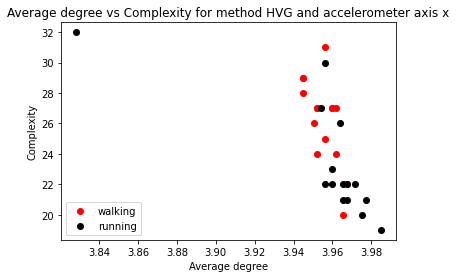

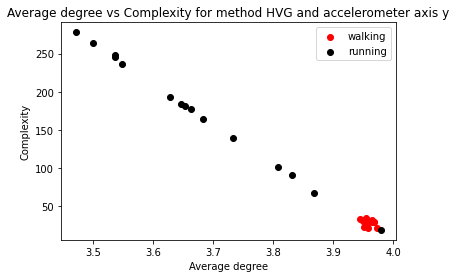

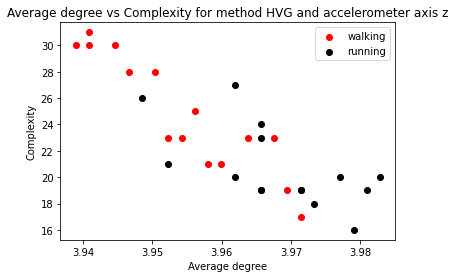

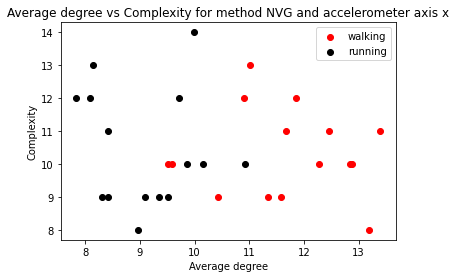

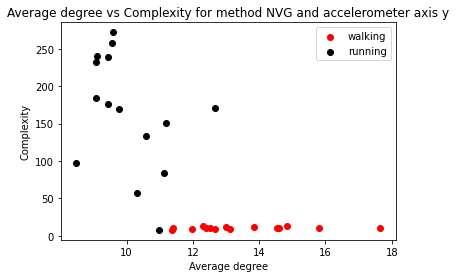

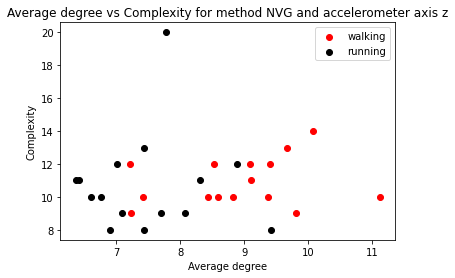

In [ ]:
#Generating scatter plots for average degree vs network diameter (Walking and running)

draw_1(c_walking_HVG_x, c_running_HVG_x)
draw_1(c_walking_HVG_y, c_running_HVG_y)
draw_1(c_walking_HVG_z, c_running_HVG_z)
draw_1(c_walking_NVG_x, c_running_NVG_x)
draw_1(c_walking_NVG_y, c_running_NVG_y)
draw_1(c_walking_NVG_z, c_running_NVG_z)

### Graph for climbing up and down

In [ ]:
#climbingup_HVG

c_climbingup_HVG_x = result_chest.loc[(result_chest['Activity'] == 'climbingup') & (result_chest['Method'] == 'HVG') & (result_chest['Accelero meter axis'] == 'x')]
c_climbingup_HVG_y = result_chest.loc[(result_chest['Activity'] == 'climbingup') & (result_chest['Method'] == 'HVG') & (result_chest['Accelero meter axis'] == 'y')]
c_climbingup_HVG_z = result_chest.loc[(result_chest['Activity'] == 'climbingup') & (result_chest['Method'] == 'HVG') & (result_chest['Accelero meter axis'] == 'z')]

#climbingup_NVG

c_climbingup_NVG_x = result_chest.loc[(result_chest['Activity'] == 'climbingup') & (result_chest['Method'] == 'NVG') & (result_chest['Accelero meter axis'] == 'x')]
c_climbingup_NVG_y = result_chest.loc[(result_chest['Activity'] == 'climbingup') & (result_chest['Method'] == 'NVG') & (result_chest['Accelero meter axis'] == 'y')]
c_climbingup_NVG_z = result_chest.loc[(result_chest['Activity'] == 'climbingup') & (result_chest['Method'] == 'NVG') & (result_chest['Accelero meter axis'] == 'z')]

#climbingdown_HVG

c_climbingdown_HVG_x = result_chest.loc[(result_chest['Activity'] == 'climbingdown') & (result_chest['Method'] == 'HVG') & (result_chest['Accelero meter axis'] == 'x')]
c_climbingdown_HVG_y = result_chest.loc[(result_chest['Activity'] == 'climbingdown') & (result_chest['Method'] == 'HVG') & (result_chest['Accelero meter axis'] == 'y')]
c_climbingdown_HVG_z = result_chest.loc[(result_chest['Activity'] == 'climbingdown') & (result_chest['Method'] == 'HVG') & (result_chest['Accelero meter axis'] == 'z')]

#climbingdown_NVG

c_climbingdown_NVG_x = result_chest.loc[(result_chest['Activity'] == 'climbingdown') & (result_chest['Method'] == 'NVG') & (result_chest['Accelero meter axis'] == 'x')]
c_climbingdown_NVG_y = result_chest.loc[(result_chest['Activity'] == 'climbingdown') & (result_chest['Method'] == 'NVG') & (result_chest['Accelero meter axis'] == 'y')]
c_climbingdown_NVG_z = result_chest.loc[(result_chest['Activity'] == 'climbingdown') & (result_chest['Method'] == 'NVG') & (result_chest['Accelero meter axis'] == 'z')]

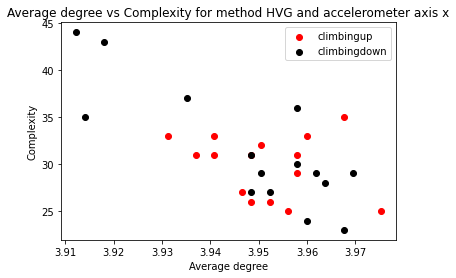

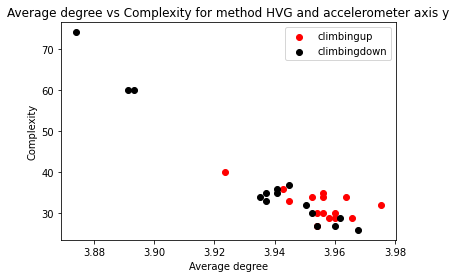

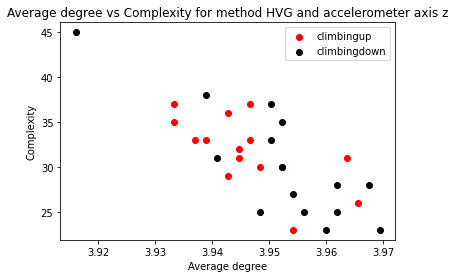

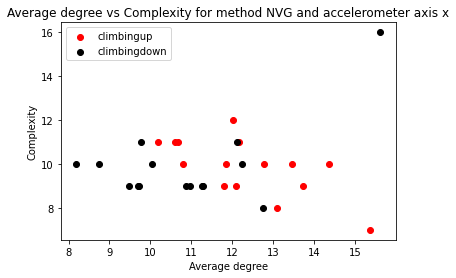

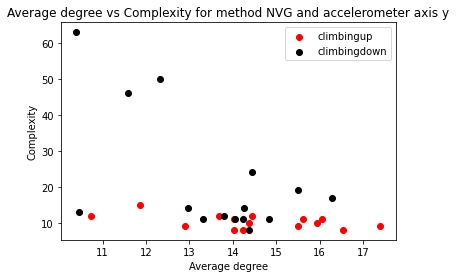

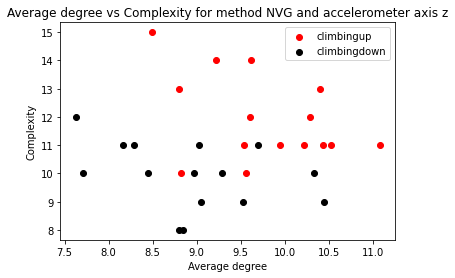

In [ ]:
#Generating scatter plots for average degree vs network diameter (climbingup and climbingdown)

draw_1(c_climbingup_HVG_x, c_climbingdown_HVG_x)
draw_1(c_climbingup_HVG_y, c_climbingdown_HVG_y)
draw_1(c_climbingup_HVG_z, c_climbingdown_HVG_z)
draw_1(c_climbingup_NVG_x, c_climbingdown_NVG_x)
draw_1(c_climbingup_NVG_y, c_climbingdown_NVG_y)
draw_1(c_climbingup_NVG_z, c_climbingdown_NVG_z)

## HEAD

In [ ]:
d = {'Method': [], 'Subject':[], 'Accelero meter axis':[], 'Average degree':[], 'Network diameter':[], 'Averagepath length':[], 'Activity':[]}
result_head = pd.DataFrame(data=d)

In [ ]:
#subject 1 to 15
ax = ['x','y','z']
for i in range(1,16):
   #walking
   df = pd.read_csv('s' + str(i) + '_acc_walking_head.csv')
   for j in ax:
     result_head = get_task1result(df, i, j, 1000, 2048, 'walking', result_head)
   #running
   df = pd.read_csv('s' + str(i) + '_acc_running_head.csv')
   for j in ax:
     result_head = get_task1result(df, i, j, 1000, 2048, 'running', result_head)
   #climbing up
   df = pd.read_csv('s' + str(i) + '_acc_climbingup_head.csv')
   for j in ax:
     result_head = get_task1result(df, i, j, 1000, 2048, 'climbingup', result_head)
   #climbing down
   df = pd.read_csv('s' + str(i) + '_acc_climbingdown_head.csv')
   for j in ax:
     result_head = get_task1result(df, i, j, 1000, 2048, 'climbingdown',result_head)

In [ ]:
#Output dataframe

result_head

,Method,Subject,Accelero meter axis,Average degree,Network diameter,Averagepath length,Activity
0,HVG,1.0,x,3.950382,35.0,16.534078,walking
1,NVG,1.0,x,12.501908,10.0,4.556144,walking
2,HVG,1.0,y,3.961832,24.0,10.141077,walking
3,NVG,1.0,y,13.099237,10.0,4.350731,walking
4,HVG,1.0,z,3.940840,34.0,14.605990,walking
...,...,...,...,...,...,...,...
355,NVG,15.0,x,8.001908,13.0,5.178061,climbingdown
356,HVG,15.0,y,3.965649,34.0,14.247556,climbingdown
357,NVG,15.0,y,14.490458,8.0,4.251839,climbingdown
358,HVG,15.0,z,3.950382,38.0,16.475996,climbingdown


### Graph for walking and running

In [ ]:
#walking_HVG

h_walking_HVG_x = result_head.loc[(result_head['Activity'] == 'walking') & (result_head['Method'] == 'HVG') & (result_head['Accelero meter axis'] == 'x')]
h_walking_HVG_y = result_head.loc[(result_head['Activity'] == 'walking') & (result_head['Method'] == 'HVG') & (result_head['Accelero meter axis'] == 'y')]
h_walking_HVG_z = result_head.loc[(result_head['Activity'] == 'walking') & (result_head['Method'] == 'HVG') & (result_head['Accelero meter axis'] == 'z')]

#walking_NVG

h_walking_NVG_x = result_head.loc[(result_head['Activity'] == 'walking') & (result_head['Method'] == 'NVG') & (result_head['Accelero meter axis'] == 'x')]
h_walking_NVG_y = result_head.loc[(result_head['Activity'] == 'walking') & (result_head['Method'] == 'NVG') & (result_head['Accelero meter axis'] == 'y')]
h_walking_NVG_z = result_head.loc[(result_head['Activity'] == 'walking') & (result_head['Method'] == 'NVG') & (result_head['Accelero meter axis'] == 'z')]

#running_HVG

h_running_HVG_x = result_head.loc[(result_head['Activity'] == 'running') & (result_head['Method'] == 'HVG') & (result_head['Accelero meter axis'] == 'x')]
h_running_HVG_y = result_head.loc[(result_head['Activity'] == 'running') & (result_head['Method'] == 'HVG') & (result_head['Accelero meter axis'] == 'y')]
h_running_HVG_z = result_head.loc[(result_head['Activity'] == 'running') & (result_head['Method'] == 'HVG') & (result_head['Accelero meter axis'] == 'z')]

#running_NVG

h_running_NVG_x = result_head.loc[(result_head['Activity'] == 'running') & (result_head['Method'] == 'NVG') & (result_head['Accelero meter axis'] == 'x')]
h_running_NVG_y = result_head.loc[(result_head['Activity'] == 'running') & (result_head['Method'] == 'NVG') & (result_head['Accelero meter axis'] == 'y')]
h_running_NVG_z = result_head.loc[(result_head['Activity'] == 'running') & (result_head['Method'] == 'NVG') & (result_head['Accelero meter axis'] == 'z')]

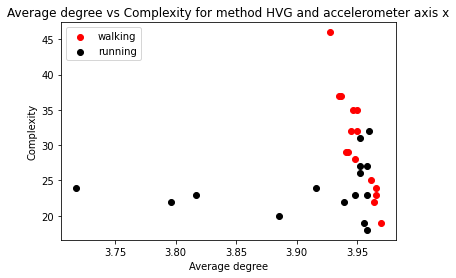

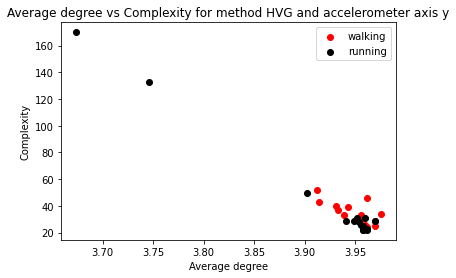

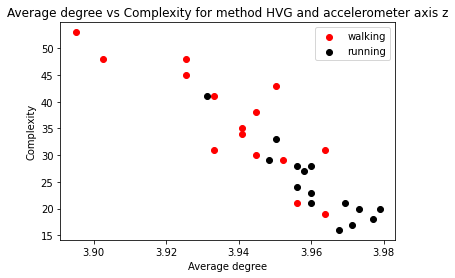

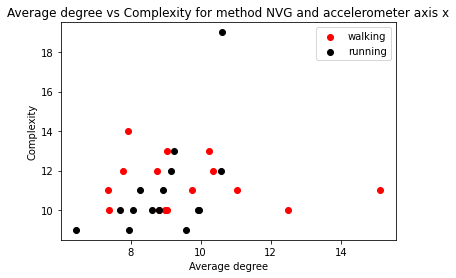

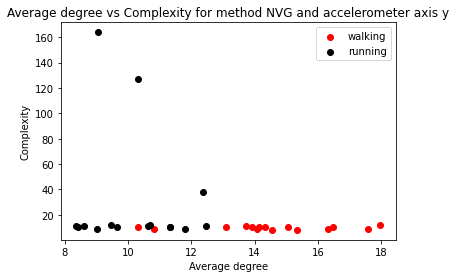

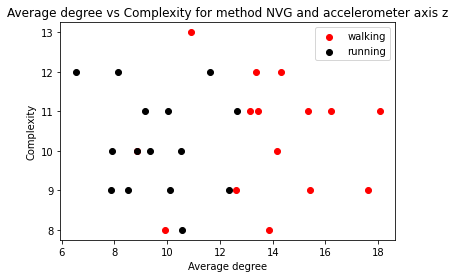

In [ ]:
#Generating scatter plots for average degree vs network diameter (Walking and running)

draw_1(h_walking_HVG_x, h_running_HVG_x)
draw_1(h_walking_HVG_y, h_running_HVG_y)
draw_1(h_walking_HVG_z, h_running_HVG_z)
draw_1(h_walking_NVG_x, h_running_NVG_x)
draw_1(h_walking_NVG_y, h_running_NVG_y)
draw_1(h_walking_NVG_z, h_running_NVG_z)

### Graph for climbing up and down

In [ ]:
#climbingup_HVG

h_climbingup_HVG_x = result_head.loc[(result_head['Activity'] == 'climbingup') & (result_head['Method'] == 'HVG') & (result_head['Accelero meter axis'] == 'x')]
h_climbingup_HVG_y = result_head.loc[(result_head['Activity'] == 'climbingup') & (result_head['Method'] == 'HVG') & (result_head['Accelero meter axis'] == 'y')]
h_climbingup_HVG_z = result_head.loc[(result_head['Activity'] == 'climbingup') & (result_head['Method'] == 'HVG') & (result_head['Accelero meter axis'] == 'z')]

#climbingup_NVG

h_climbingup_NVG_x = result_head.loc[(result_head['Activity'] == 'climbingup') & (result_head['Method'] == 'NVG') & (result_head['Accelero meter axis'] == 'x')]
h_climbingup_NVG_y = result_head.loc[(result_head['Activity'] == 'climbingup') & (result_head['Method'] == 'NVG') & (result_head['Accelero meter axis'] == 'y')]
h_climbingup_NVG_z = result_head.loc[(result_head['Activity'] == 'climbingup') & (result_head['Method'] == 'NVG') & (result_head['Accelero meter axis'] == 'z')]

#climbingdown_HVG

h_climbingdown_HVG_x = result_head.loc[(result_head['Activity'] == 'climbingdown') & (result_head['Method'] == 'HVG') & (result_head['Accelero meter axis'] == 'x')]
h_climbingdown_HVG_y = result_head.loc[(result_head['Activity'] == 'climbingdown') & (result_head['Method'] == 'HVG') & (result_head['Accelero meter axis'] == 'y')]
h_climbingdown_HVG_z = result_head.loc[(result_head['Activity'] == 'climbingdown') & (result_head['Method'] == 'HVG') & (result_head['Accelero meter axis'] == 'z')]

#climbingdown_NVG

h_climbingdown_NVG_x = result_head.loc[(result_head['Activity'] == 'climbingdown') & (result_head['Method'] == 'NVG') & (result_head['Accelero meter axis'] == 'x')]
h_climbingdown_NVG_y = result_head.loc[(result_head['Activity'] == 'climbingdown') & (result_head['Method'] == 'NVG') & (result_head['Accelero meter axis'] == 'y')]
h_climbingdown_NVG_z = result_head.loc[(result_head['Activity'] == 'climbingdown') & (result_head['Method'] == 'NVG') & (result_head['Accelero meter axis'] == 'z')]

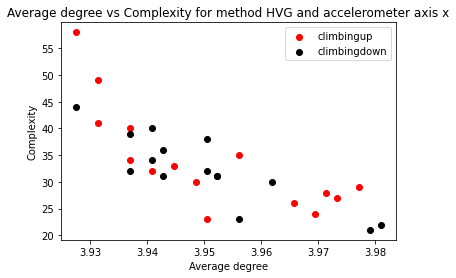

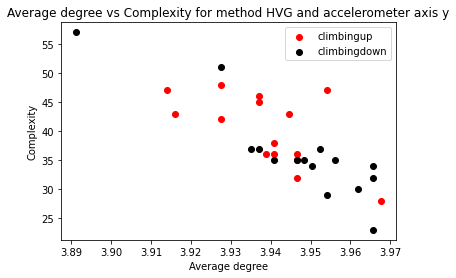

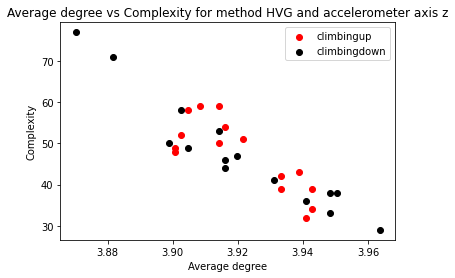

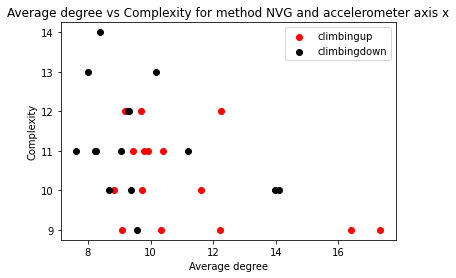

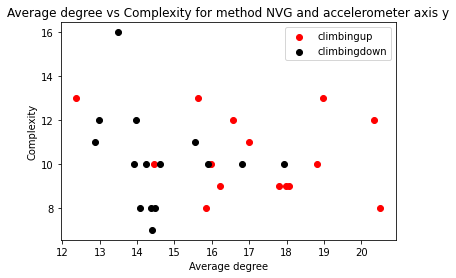

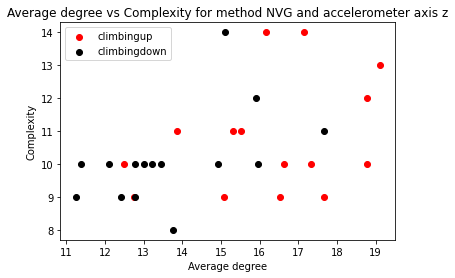

In [ ]:
#Generating scatter plots for average degree vs network diameter (climbingup and climbingdown)

draw_1(h_climbingup_HVG_x, h_climbingdown_HVG_x)
draw_1(h_climbingup_HVG_y, h_climbingdown_HVG_y)
draw_1(h_climbingup_HVG_z, h_climbingdown_HVG_z)
draw_1(h_climbingup_NVG_x, h_climbingdown_NVG_x)
draw_1(h_climbingup_NVG_y, h_climbingdown_NVG_y)
draw_1(h_climbingup_NVG_z, h_climbingdown_NVG_z)

# Task 2

Helper function here.

In [ ]:
def s_entropy(freq_list):
    ''' This function computes the shannon entropy of a given frequency distribution.
    USAGE: shannon_entropy(freq_list)
    ARGS: freq_list = Numeric vector representing the frequency distribution
    OUTPUT: A numeric value representing shannon's entropy'''
    freq_list = [element for element in freq_list if element != 0]
    sh_entropy = 0.0
    for freq in freq_list:
        sh_entropy += freq * np.log(freq)
    sh_entropy = -sh_entropy
    return(sh_entropy)

def ordinal_patterns(ts, embdim, embdelay):
    ''' This function computes the ordinal patterns of a time series for a given embedding dimension and embedding delay.
    USAGE: ordinal_patterns(ts, embdim, embdelay)
    ARGS: ts = Numeric vector representing the time series, embdim = embedding dimension (3<=embdim<=7 prefered range), embdelay =  embdding delay
    OUPTUT: A numeric vector representing frequencies of ordinal patterns'''
    m, t = embdim, embdelay
    x = ts if isinstance(ts, np.ndarray) else np.array(ts) 

    tmp = np.zeros((x.shape[0], m))
    for i in range(m):
        tmp[:, i] = np.roll(x, i*t)
    partition = tmp[(t*m-1):, :] 
    permutation = np.argsort(partition)
    idx = _hash(permutation)

    counts = np.zeros(np.math.factorial(m))
    for i in range(counts.shape[0]):
        counts[i] = (idx == i).sum()
    return list(counts[counts != 0].astype(int))

def _hash(x):
    m, n = x.shape
    if n == 1:
        return np.zeros(m)
    return np.sum(np.apply_along_axis(lambda y: y < x[:, 0], 0, x), axis=1) * np.math.factorial(n-1) + _hash(x[:, 1:]) 
    

def p_entropy(op):
    ordinal_pat = op
    max_entropy = np.log(len(ordinal_pat))
    p = np.divide(np.array(ordinal_pat), float(sum(ordinal_pat)))
    return(s_entropy(p)/max_entropy)

def complexity(op):
    ''' This function computes the complexity of a time series defined as: Comp_JS = Q_o * JSdivergence * pe
    Q_o = Normalizing constant
    JSdivergence = Jensen-Shannon divergence
    pe = permutation entopry
    ARGS: ordinal pattern'''
    pe = p_entropy(op)
    constant1 = (0.5+((1 - 0.5)/len(op)))* np.log(0.5+((1 - 0.5)/len(op)))
    constant2 = ((1 - 0.5)/len(op))*np.log((1 - 0.5)/len(op))*(len(op) - 1)
    constant3 = 0.5*np.log(len(op))
    Q_o = -1/(constant1+constant2+constant3)

    temp_op_prob = np.divide(op, sum(op))
    temp_op_prob2 = (0.5*temp_op_prob)+(0.5*(1/len(op)))
    JSdivergence = (s_entropy(temp_op_prob2) - 0.5 * s_entropy(temp_op_prob) - 0.5 * np.log(len(op)))
    Comp_JS = Q_o * JSdivergence * pe
    return(Comp_JS)

def weighted_ordinal_patterns(ts, embdim, embdelay):
    m, t = embdim, embdelay
    x = ts if isinstance(ts, np.ndarray) else np.array(ts) 

    tmp = np.zeros((x.shape[0], m))
    for i in range(m):
        tmp[:, i] = np.roll(x, i*t)
    partition = tmp[(t*m-1):, :] 
    xm = np.mean(partition, axis=1)
    weight = np.mean((partition - xm[:, None])**2, axis=1)
    permutation = np.argsort(partition)
    idx = _hash(permutation)
    counts = np.zeros(np.math.factorial(m))
    for i in range(counts.shape[0]):
        counts[i] = sum(weight[i == idx])

    return list(counts[counts != 0])
    
def get_result(subject,df,Signal_length,Dimensi_on,Delay,Activity,result):
    axis = ['x','y','z']
    for ax in axis:
        j = 0
        pe = []
        comp = []
        a = int(len(df.index)/Signal_length)
        for i in range(1,a):
            op_sitting = ordinal_patterns(df['attr_'+ax][j:(j + Signal_length)], Dimensi_on, Delay)
            pe.append(p_entropy(op_sitting))
            comp.append(complexity(op_sitting))
            j = j + Signal_length+1
            result.loc[len(result.index)] = [subject, ax, Signal_length, Dimensi_on, Delay, pe[-1], comp[-1], Activity]
            
    return result
    
def draw_2(data,data2):
        plt.scatter(data.iloc[:, 5], data.iloc[:, 6], label = (data.iloc[0]['Activity']), c='red')
        plt.scatter(data2.iloc[:, 5], data2.iloc[:, 6], label = (data2.iloc[0]['Activity']), c='black')
        plt.xlabel('Permutation Entropy')
        plt.ylabel('Complexity')
        plt.title('Permutation Entropy vs Complexity')
        plt.legend()
        plt.show()

## CHEST

In [ ]:
d = {'Subject':[],'Accelero meter axis':[],'Signal length':[],'Dimension':[],'Delay':[],'Permuttion entropy':[],'Complexity':[],'Activity':[]}
result2 = pd.DataFrame(data=d)

In [ ]:
#subject 1 to 15
Delay = [1, 2, 3] #tow
Dimension = [3, 4, 5, 6] #D
Signallength = [1024, 2048, 4096]
for i in range(1, 16):
  for d in Delay:
     for dim in Dimension:
        for s in Signallength:
          #walking
          df = pd.read_csv('s' + str(i) + '_acc_walking_chest.csv')
          result2 = get_result(i, df, int(s), dim, d, 'walking', result2)
          #running
          df=pd.read_csv('s'+str(i)+'_acc_running_chest.csv')
          result2=get_result(i,df,int(s),dim,d,'running',result2)
          df=pd.read_csv('s'+str(i)+'_acc_climbingdown_chest.csv')
          result2=get_result(i,df,int(s),dim,d,'climbing down',result2)
          df=pd.read_csv('s'+str(i)+'_acc_climbingup_chest.csv')
          result2=get_result(i,df,int(s),dim,d,'climbing up',result2)

In [23]:
#Output dataframe

result2

,Subject,Accelero meter axis,Signal length,Dimension,Delay,Permuttion entropy,Complexity,Activity
0,1.0,x,1024.0,3.0,1.0,0.855987,0.119191,walking
1,1.0,x,1024.0,3.0,1.0,0.831776,0.136343,walking
2,1.0,x,1024.0,3.0,1.0,0.819428,0.144502,walking
3,1.0,x,1024.0,3.0,1.0,0.810827,0.150240,walking
4,1.0,x,1024.0,3.0,1.0,0.808244,0.152132,walking
...,...,...,...,...,...,...,...,...
98455,15.0,z,4096.0,6.0,3.0,0.851922,0.233551,climbing up
98456,15.0,z,4096.0,6.0,3.0,0.867974,0.219129,climbing up
98457,15.0,z,4096.0,6.0,3.0,0.878426,0.210024,climbing up
98458,15.0,z,4096.0,6.0,3.0,0.872231,0.216436,climbing up


###Graph for walking and running

<ipython-input-24-9541817dbc9d>:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
<ipython-input-24-9541817dbc9d>:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
<ipython-input-24-9541817dbc9d>:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
<ipython-input-24-9541817dbc9d>

<Figure size 432x288 with 0 Axes>

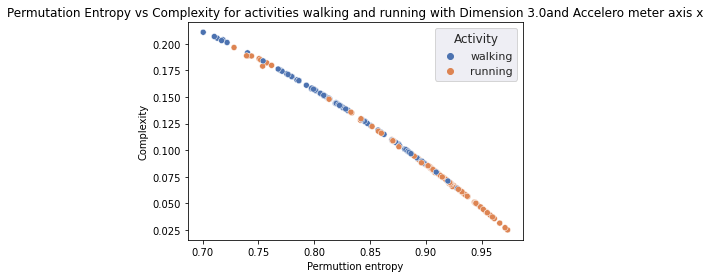

<Figure size 576x360 with 0 Axes>

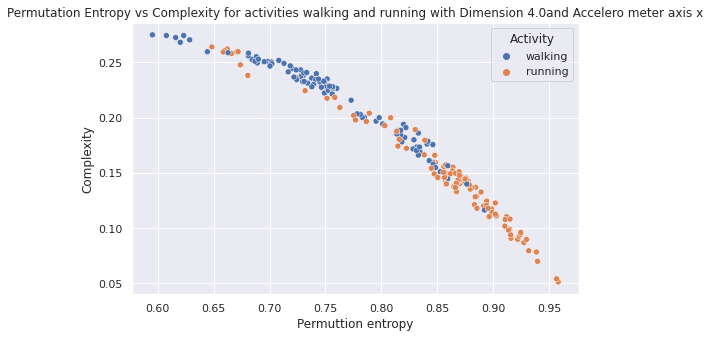

<Figure size 576x360 with 0 Axes>

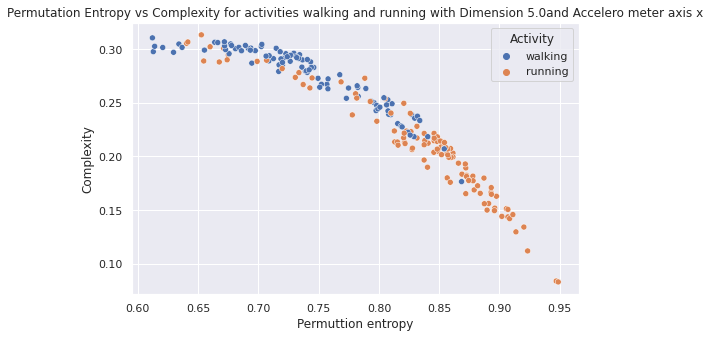

<Figure size 576x360 with 0 Axes>

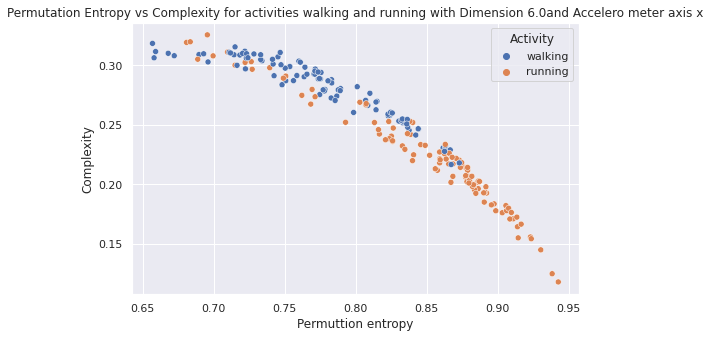

<Figure size 576x360 with 0 Axes>

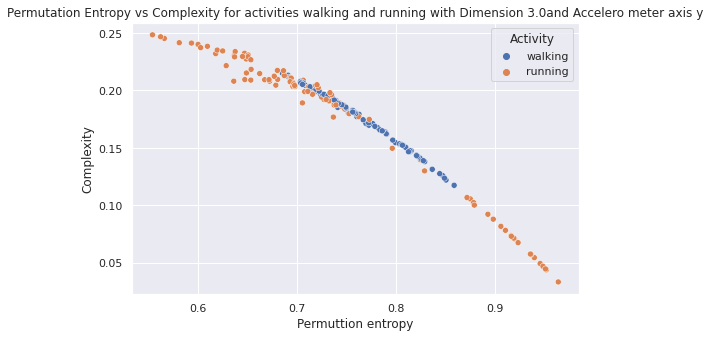

<Figure size 576x360 with 0 Axes>

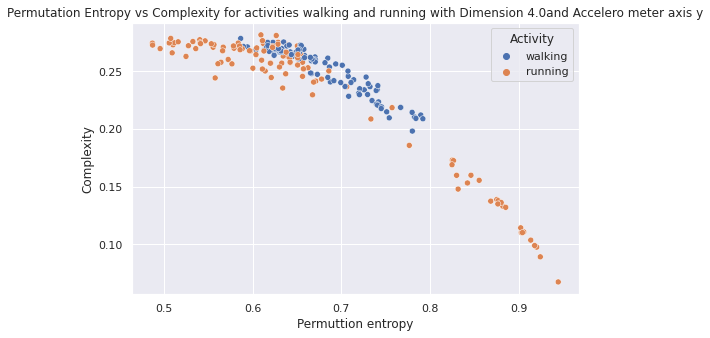

<Figure size 576x360 with 0 Axes>

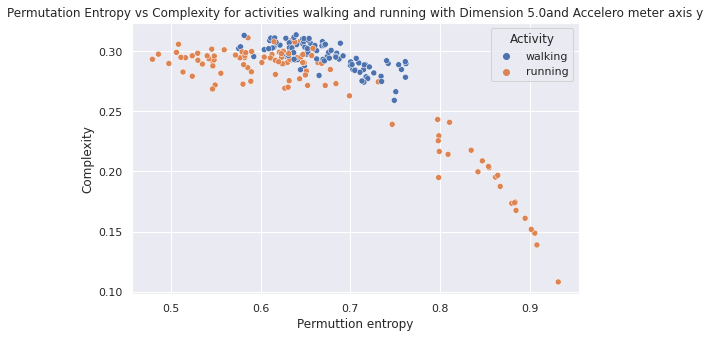

<Figure size 576x360 with 0 Axes>

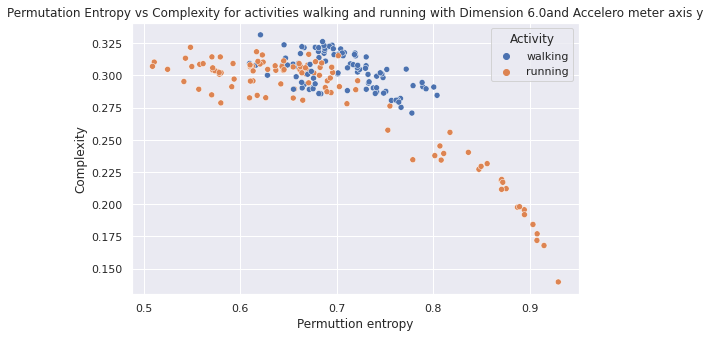

<Figure size 576x360 with 0 Axes>

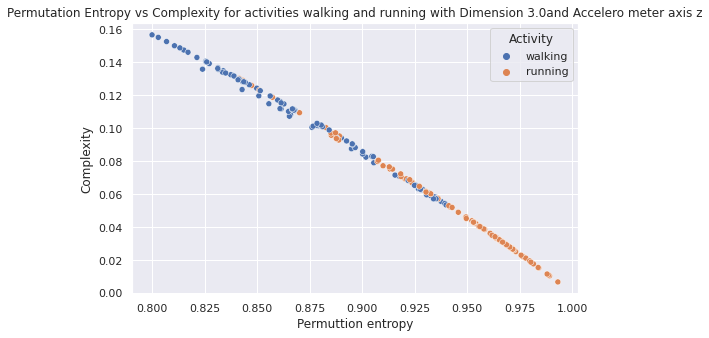

<Figure size 576x360 with 0 Axes>

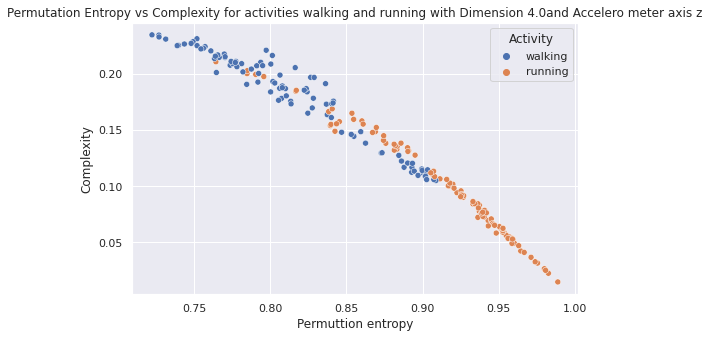

<Figure size 576x360 with 0 Axes>

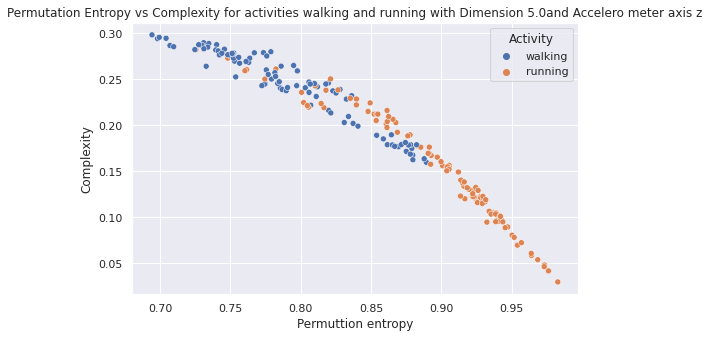

<Figure size 576x360 with 0 Axes>

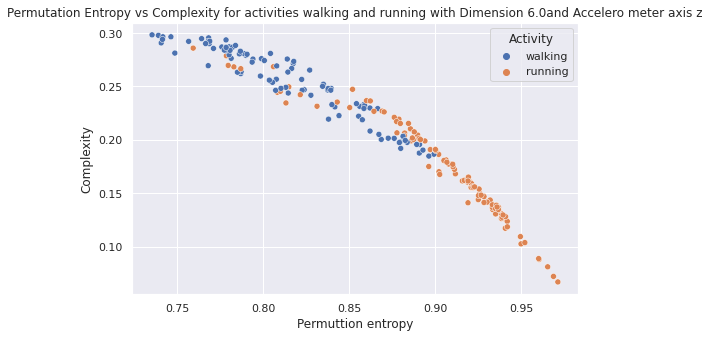

In [24]:
for i in ['x','y','z']:
  for j in result2['Dimension'].unique():
    walking_running_1024_df = result2.loc[ (result2['Signal length'] == 4096) & (result2['Accelero meter axis'] == i) & (result2['Delay'] == 1) & (result2['Dimension'] == j) ]
    walking_running_1024_df= walking_running_1024_df[(walking_running_1024_df['Activity']=='walking') | (walking_running_1024_df['Activity']=='running')]
    walking_running_df=walking_running_1024_df
    plt.figure()
    plt.tight_layout()
    fig, ax = plt.subplots()
    sns.set(rc={"figure.figsize":(8, 5)})
    #f, (ax_box, ax_hist) = plt.subplots(2, sharex=True)
    plt.gca().set(xlabel= 'Permuttion entropy',ylabel='Complexity')
    title="Permutation Entropy vs Complexity for activities walking and running with Dimension "+str(j)+"and Accelero meter axis "+i
    ax.set_title(title)
    sns.scatterplot(data = walking_running_df, x='Permuttion entropy', y ='Complexity', hue = 'Activity')


###Graph for climbing up and down

<Figure size 576x360 with 0 Axes>

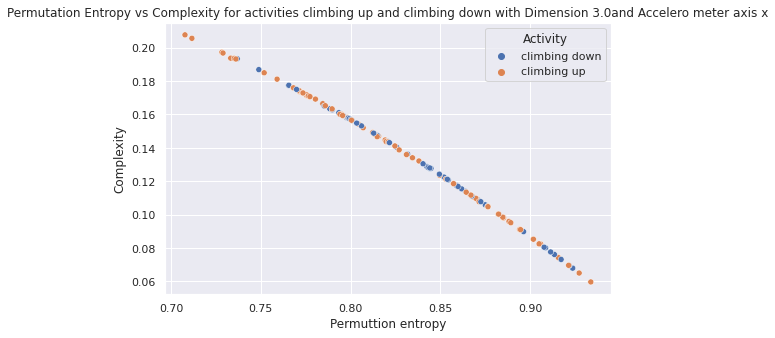

<Figure size 576x360 with 0 Axes>

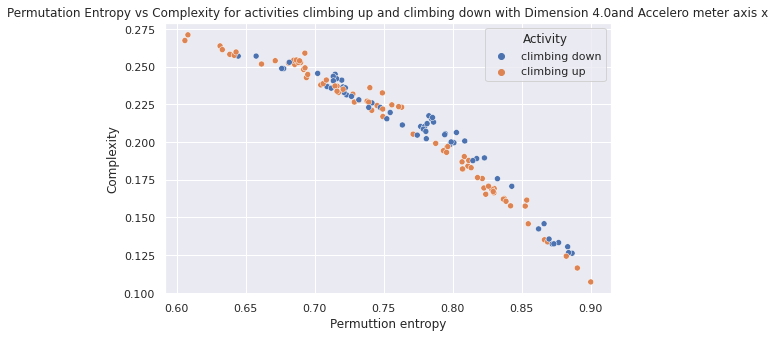

<Figure size 576x360 with 0 Axes>

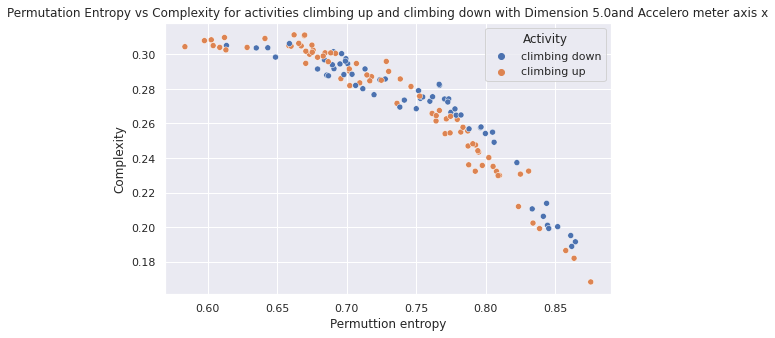

<Figure size 576x360 with 0 Axes>

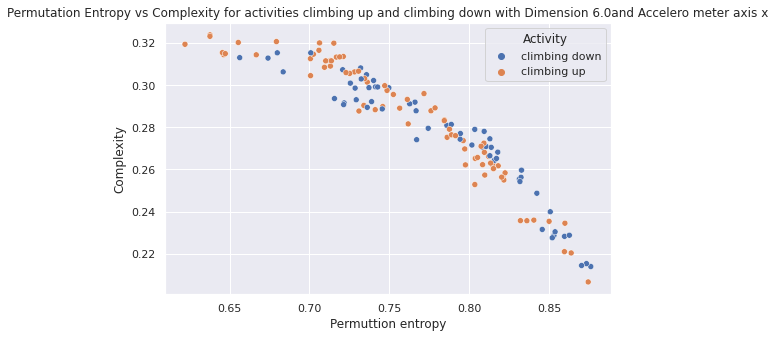

<Figure size 576x360 with 0 Axes>

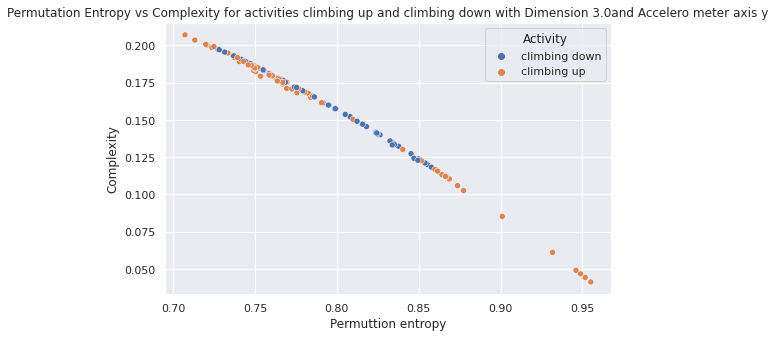

<Figure size 576x360 with 0 Axes>

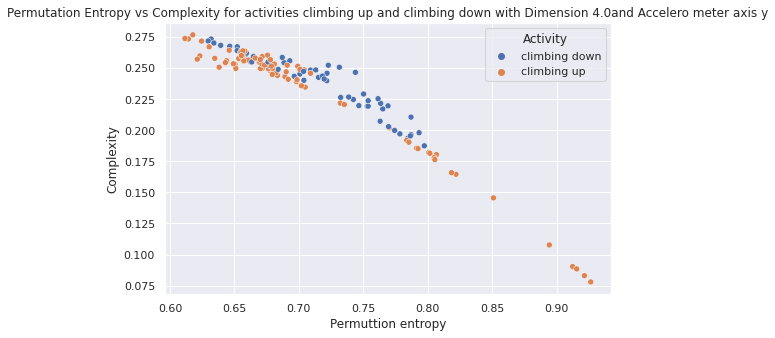

<Figure size 576x360 with 0 Axes>

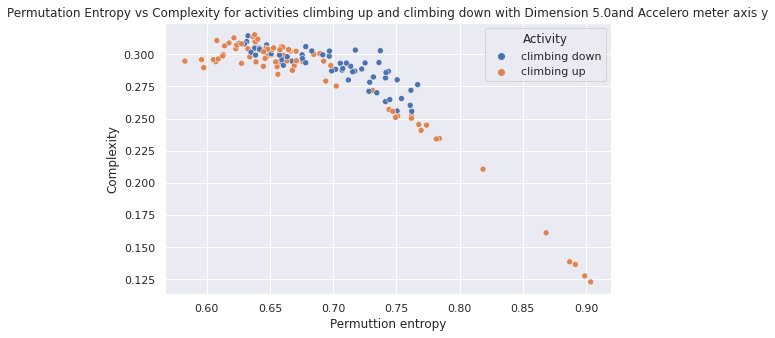

<Figure size 576x360 with 0 Axes>

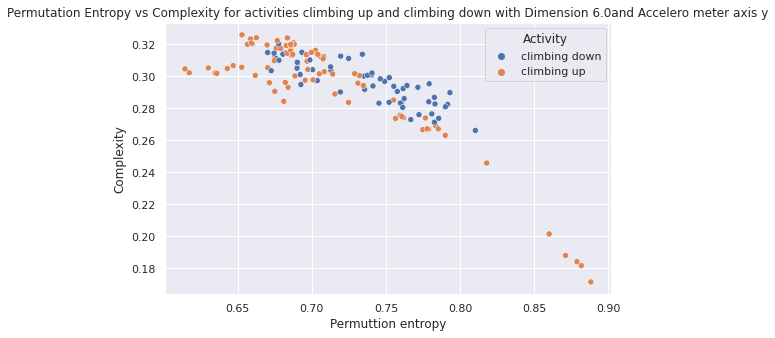

<Figure size 576x360 with 0 Axes>

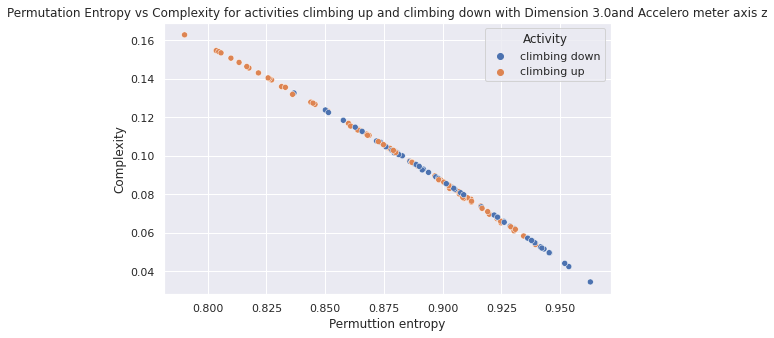

<Figure size 576x360 with 0 Axes>

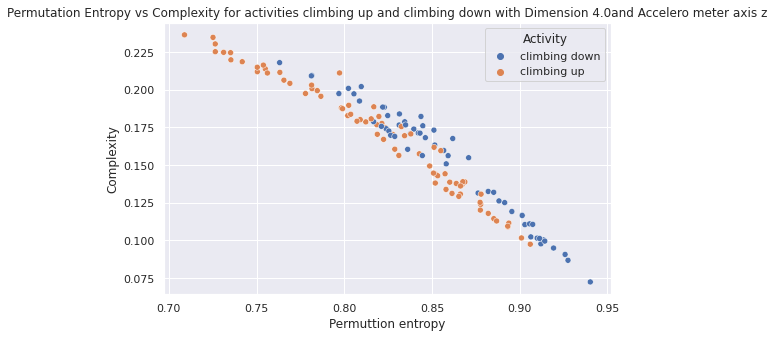

<Figure size 576x360 with 0 Axes>

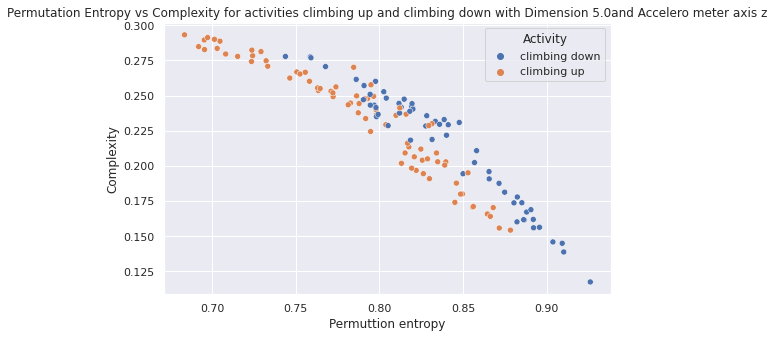

<Figure size 576x360 with 0 Axes>

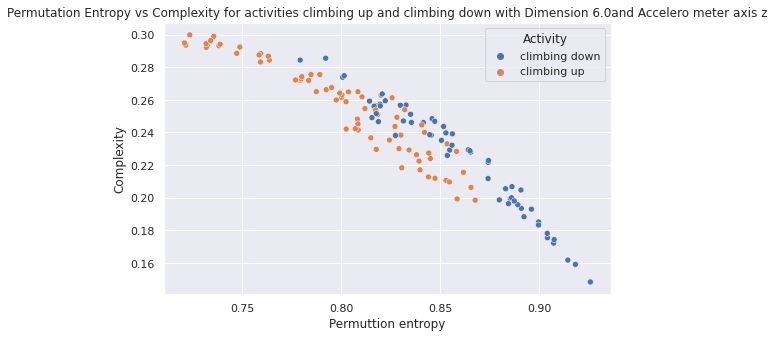

In [35]:
for i in ['x','y','z']:
  for j in result2['Dimension'].unique():
    walking_running_1024_df = result2.loc[ (result2['Signal length'] == 4096) & (result2['Accelero meter axis'] == i) & (result2['Delay'] == 1) & (result2['Dimension'] == j) ]
    walking_running_1024_df= walking_running_1024_df[(walking_running_1024_df['Activity']=='climbing up') | (walking_running_1024_df['Activity']=='climbing down')]
    walking_running_df=walking_running_1024_df
    plt.figure()
    plt.tight_layout()
    fig, ax = plt.subplots()
    sns.set(rc={"figure.figsize":(8, 5)})
    #f, (ax_box, ax_hist) = plt.subplots(2, sharex=True)
    plt.gca().set(xlabel= 'Permuttion entropy',ylabel='Complexity')
    title="Permutation Entropy vs Complexity for activities climbing up and climbing down with Dimension "+str(j)+"and Accelero meter axis "+i
    ax.set_title(title)
    sns.scatterplot(data = walking_running_df, x='Permuttion entropy', y ='Complexity', hue = 'Activity')


## HEAD

In [31]:
d = {'Subject':[],'Accelero meter axis':[],'Signal length':[],'Dimension':[],'Delay':[],'Permuttion entropy':[],'Complexity':[],'Activity':[]}
result3 = pd.DataFrame(data=d)

In [32]:
#subject 1 to 15
Delay = [1, 2, 3]
Dimension = [3, 4, 5, 6]
Signallength = [1024, 2048, 4096]
for i in range(1,16):
  for d in Delay:
     for dim in Dimension:
        for s in Signallength:
          #walking
          df=pd.read_csv('s'+str(i)+'_acc_walking_head.csv')
          result3=get_result(i,df,int(s),dim,d,'walking',result3)
          #running
          df=pd.read_csv('s'+str(i)+'_acc_running_head.csv')
          result3=get_result(i,df,int(s),dim,d,'running',result3)
          df=pd.read_csv('s'+str(i)+'_acc_climbingdown_head.csv')
          result3=get_result(i,df,int(s),dim,d,'climbing down',result3)
          df=pd.read_csv('s'+str(i)+'_acc_climbingup_head.csv')
          result3=get_result(i,df,int(s),dim,d,'climbing up',result3)

In [33]:
#Output dataframe

result3

,Subject,Accelero meter axis,Signal length,Dimension,Delay,Permuttion entropy,Complexity,Activity
0,1.0,x,1024.0,3.0,1.0,0.775745,0.171051,walking
1,1.0,x,1024.0,3.0,1.0,0.843227,0.127638,walking
2,1.0,x,1024.0,3.0,1.0,0.802885,0.153955,walking
3,1.0,x,1024.0,3.0,1.0,0.797083,0.153551,walking
4,1.0,x,1024.0,3.0,1.0,0.786493,0.158177,walking
...,...,...,...,...,...,...,...,...
98455,15.0,z,4096.0,6.0,3.0,0.863322,0.227222,climbing up
98456,15.0,z,4096.0,6.0,3.0,0.871836,0.224449,climbing up
98457,15.0,z,4096.0,6.0,3.0,0.874997,0.219653,climbing up
98458,15.0,z,4096.0,6.0,3.0,0.869829,0.222802,climbing up


###Graph for walking and running

<Figure size 576x360 with 0 Axes>

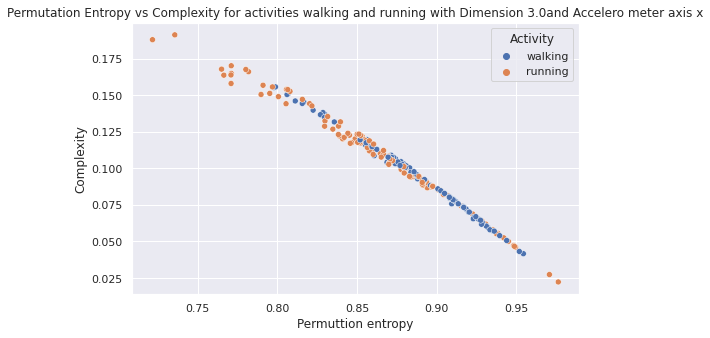

<Figure size 576x360 with 0 Axes>

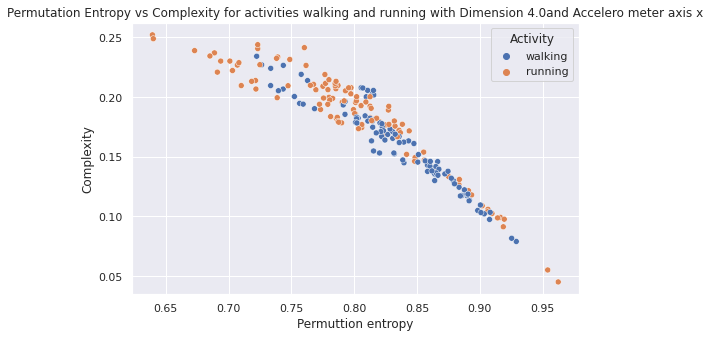

<Figure size 576x360 with 0 Axes>

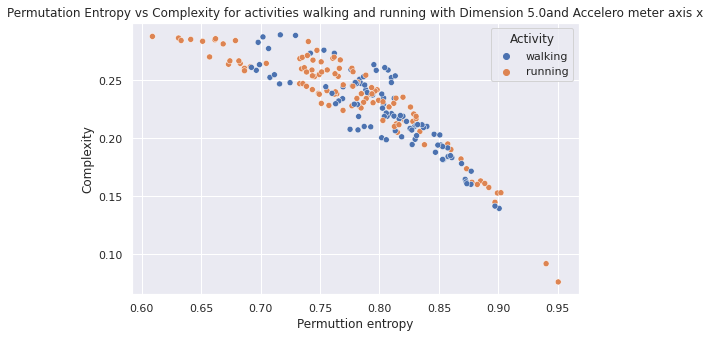

<Figure size 576x360 with 0 Axes>

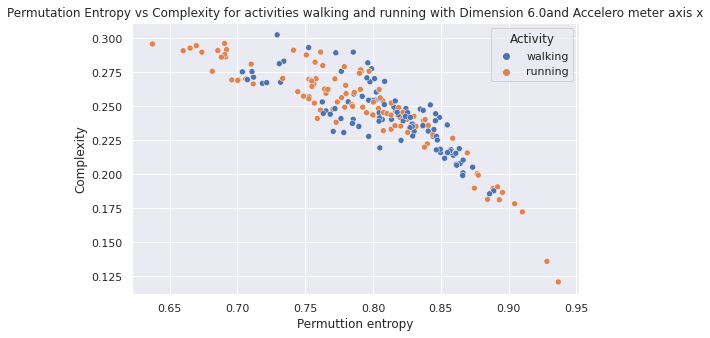

<Figure size 576x360 with 0 Axes>

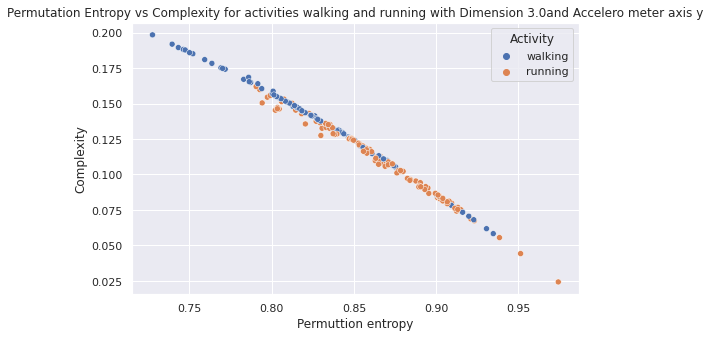

<Figure size 576x360 with 0 Axes>

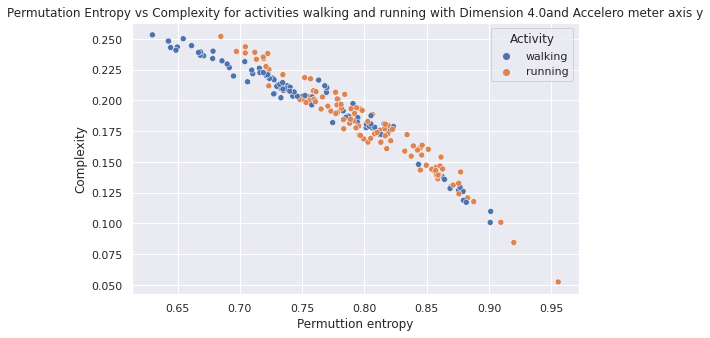

<Figure size 576x360 with 0 Axes>

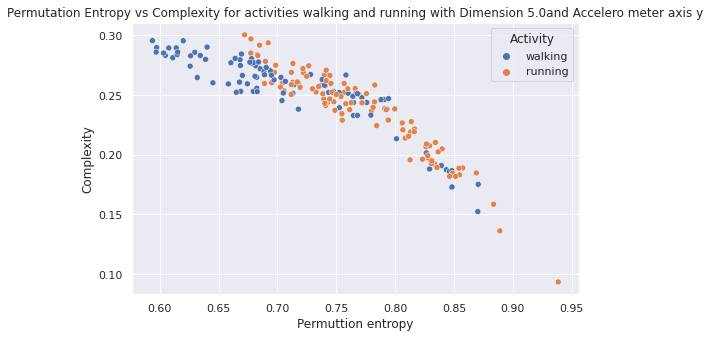

<Figure size 576x360 with 0 Axes>

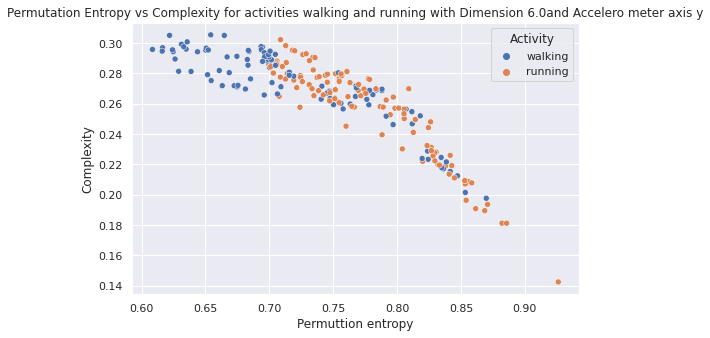

<Figure size 576x360 with 0 Axes>

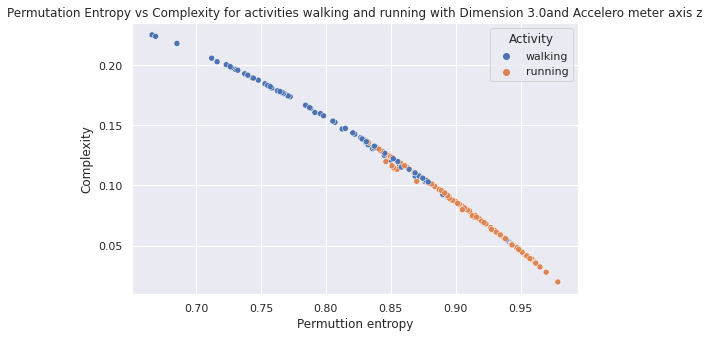

<Figure size 576x360 with 0 Axes>

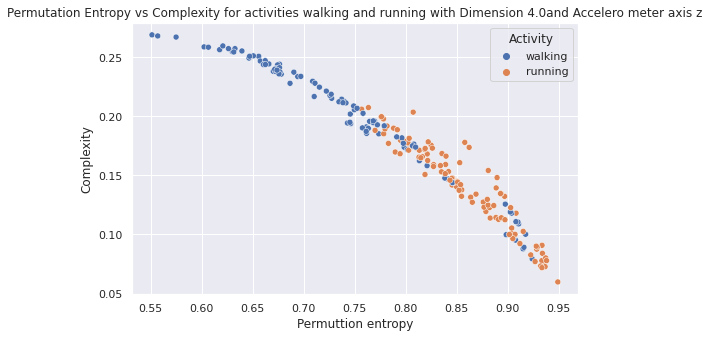

<Figure size 576x360 with 0 Axes>

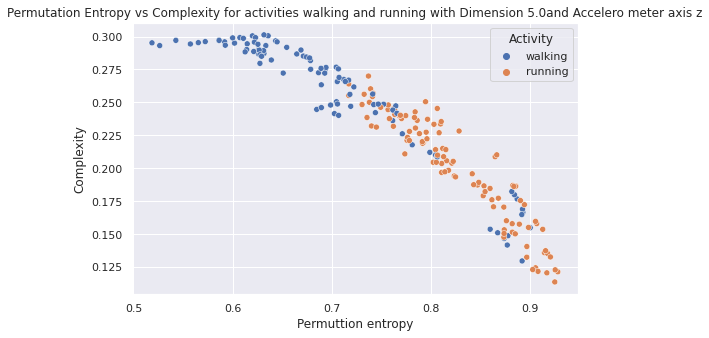

<Figure size 576x360 with 0 Axes>

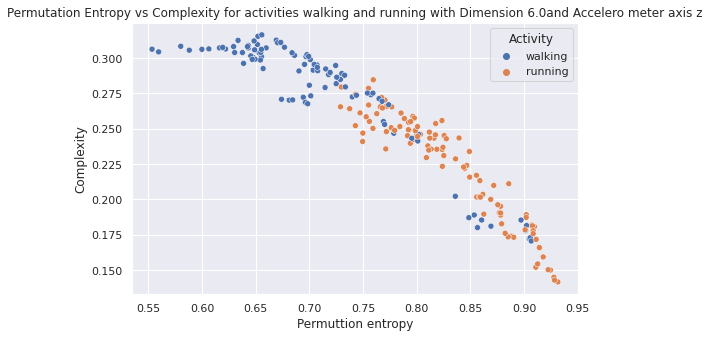

In [36]:
for i in ['x','y','z']:
  for j in result2['Dimension'].unique():
    walking_running_1024_df = result3.loc[ (result3['Signal length'] == 4096) & (result3['Accelero meter axis'] == i) & (result3['Delay'] == 1) & (result3['Dimension'] == j) ]
    walking_running_1024_df= walking_running_1024_df[(walking_running_1024_df['Activity']=='walking') | (walking_running_1024_df['Activity']=='running')]
    walking_running_df=walking_running_1024_df
    plt.figure()
    plt.tight_layout()
    fig, ax = plt.subplots()
    sns.set(rc={"figure.figsize":(8, 5)})
    #f, (ax_box, ax_hist) = plt.subplots(2, sharex=True)
    plt.gca().set(xlabel= 'Permuttion entropy',ylabel='Complexity')
    title="Permutation Entropy vs Complexity for activities walking and running with Dimension "+str(j)+"and Accelero meter axis "+i
    ax.set_title(title)
    sns.scatterplot(data = walking_running_df, x='Permuttion entropy', y ='Complexity', hue = 'Activity')


###Graph for climbing up and climbing down

<Figure size 576x360 with 0 Axes>

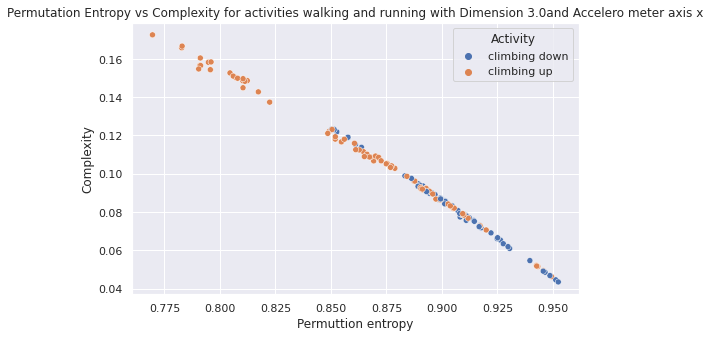

<Figure size 576x360 with 0 Axes>

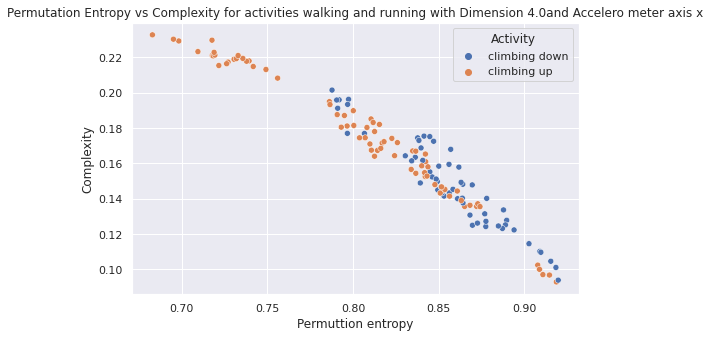

<Figure size 576x360 with 0 Axes>

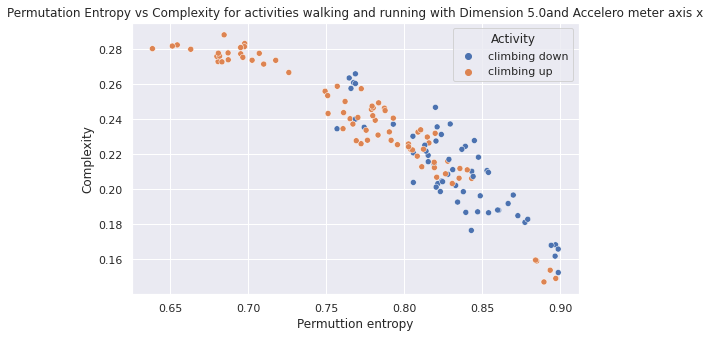

<Figure size 576x360 with 0 Axes>

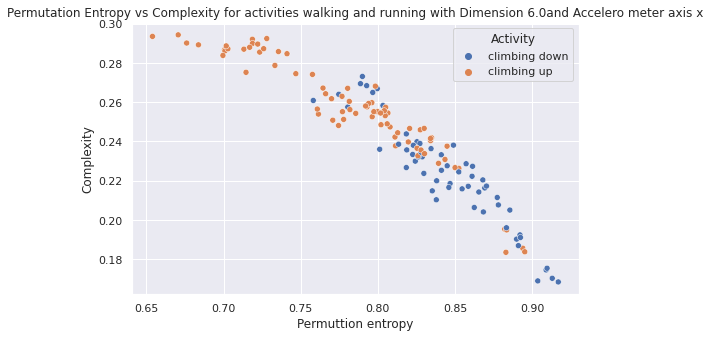

<Figure size 576x360 with 0 Axes>

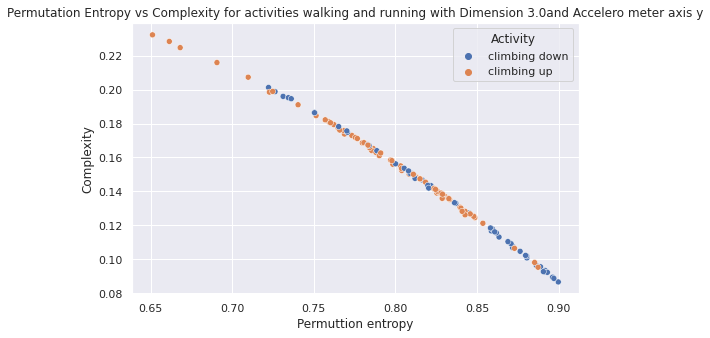

<Figure size 576x360 with 0 Axes>

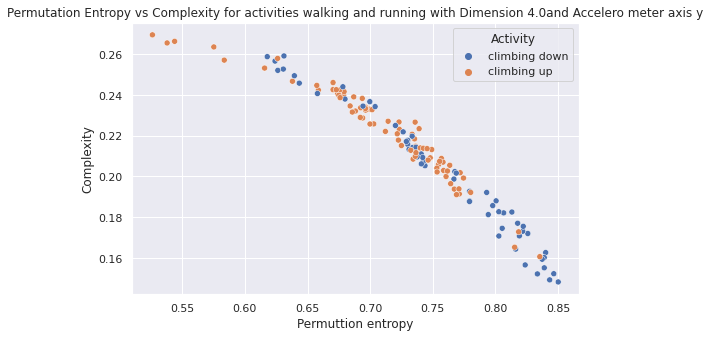

<Figure size 576x360 with 0 Axes>

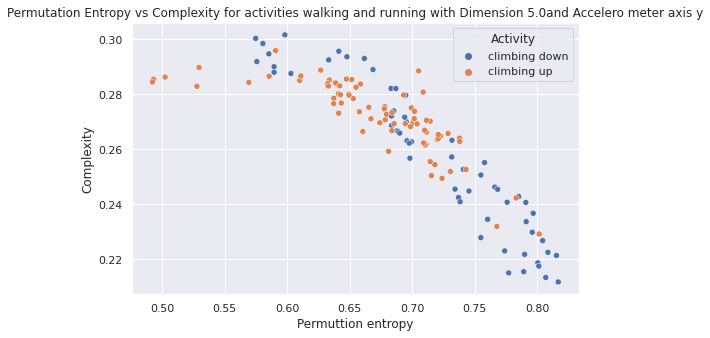

<Figure size 576x360 with 0 Axes>

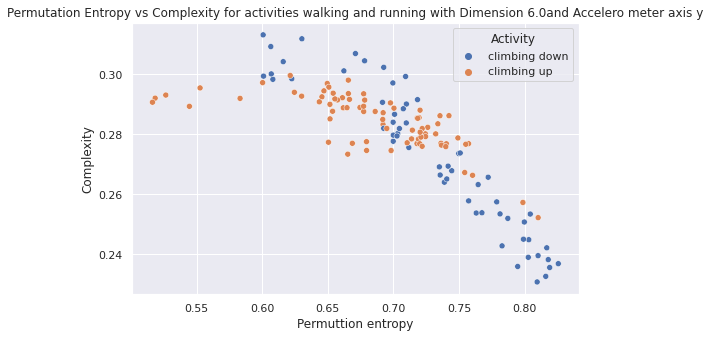

<Figure size 576x360 with 0 Axes>

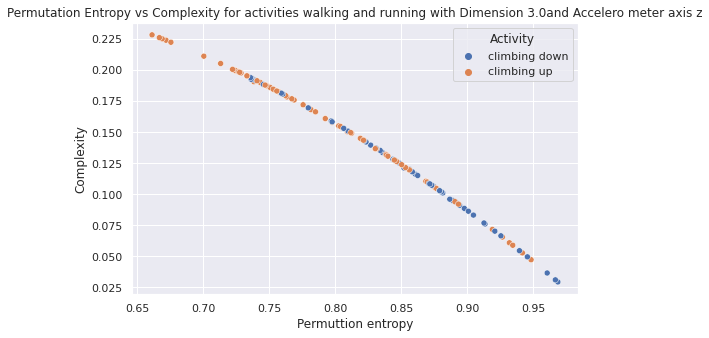

<Figure size 576x360 with 0 Axes>

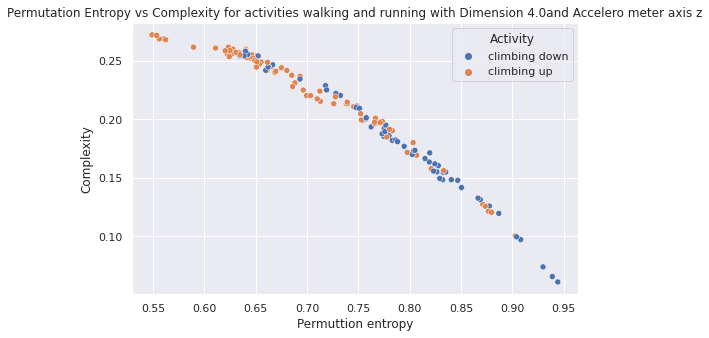

<Figure size 576x360 with 0 Axes>

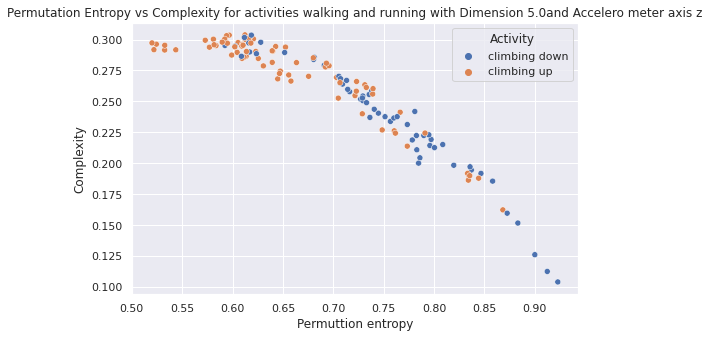

<Figure size 576x360 with 0 Axes>

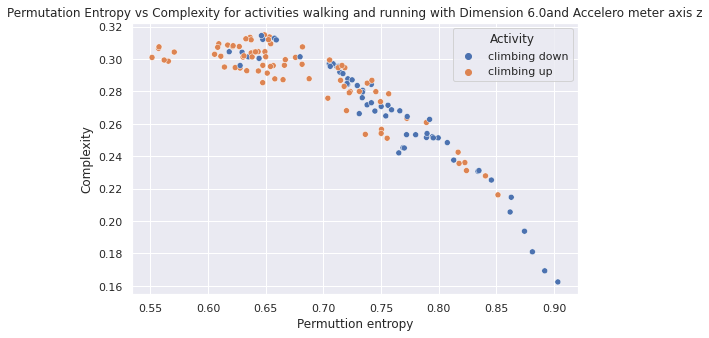

In [37]:
for i in ['x','y','z']:
  for j in result2['Dimension'].unique():
    walking_running_1024_df = result3.loc[ (result3['Signal length'] == 4096) & (result3['Accelero meter axis'] == i) & (result3['Delay'] == 1) & (result3['Dimension'] == j) ]
    walking_running_1024_df= walking_running_1024_df[(walking_running_1024_df['Activity']=='climbing up') | (walking_running_1024_df['Activity']=='climbing down')]
    walking_running_df=walking_running_1024_df
    plt.figure()
    plt.tight_layout()
    fig, ax = plt.subplots()
    sns.set(rc={"figure.figsize":(8, 5)})
    #f, (ax_box, ax_hist) = plt.subplots(2, sharex=True)
    plt.gca().set(xlabel= 'Permuttion entropy',ylabel='Complexity')
    title="Permutation Entropy vs Complexity for activities walking and running with Dimension "+str(j)+"and Accelero meter axis "+i
    ax.set_title(title)
    sns.scatterplot(data = walking_running_df, x='Permuttion entropy', y ='Complexity', hue = 'Activity')
